In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import networkx as nx
import igraph as ig
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import json
import community

In [214]:
from util.similarities_util import *
from util.load_data_util import *
from util.metrics_util import *
from util.clustering_util import Louvain, Spectral

In [143]:
f = open('paths.json')
data = json.load(f)
data_path = data['data_path']

In [144]:
G = loadData_networkX(data_path)

networkX Graph loaded. DiGraph with 5881 nodes and 35592 edges


In [226]:
g = loadData_iGraph(data_path)

iGraph Graph loaded, V: 5881 E: 35592


Negative sub-networks

In [146]:
negativeG = load_subnetwork_networkX(data_path, True)

networkX Sub-Graph loaded.


In [147]:
negativeg = load_subnetwork_iGraph(data_path, True)

iGraph Sub-Graph loaded.


In [210]:
A = np.array(g.get_adjacency(attribute='weight'))

# Similarity

In [219]:
adamic_adar_sigma = [adamic_adar_sim(A, True, True), adamic_adar_sim(A, False, True)]
print("Done Adamic Adar")
jaccard_sigma = [jaccard_sim(A, True, True), jaccard_sim(A, False, True)]
print("Done Jaccard")
# pearson_sigma = [pearson_sim(A, True, True), pearson_sim(A, False, True)]
# print("Done Pearson")
# cosine_sigma = [cosine_sim(A, True, True), cosine_sim(A, False, True)]
# print("Done Cosine")
sigmas = [adamic_adar_sigma, jaccard_sigma]


Saved File.
Saved File.
Done Adamic Adar
Saved File.
Saved File.
Done Jaccard


For verifying the similarity matrices.

In [220]:
for name, sigma in zip(['Adamic Adar', 'Jaccard'], sigmas):
    for o, s in zip(['Col/In', 'Row/Out'], sigma):
        print(f"{name} {o}: {s.shape}")
        symmetric = np.allclose(s, s.T, rtol=1e-05, atol=1e-08)
        if symmetric:
            print("\t Symmetric")
        else:
            print("\t Not Symmetric")

Adamic Adar Col/In: (5881, 5881)
	 Symmetric
Adamic Adar Row/Out: (5881, 5881)
	 Symmetric
Jaccard Col/In: (5881, 5881)
	 Symmetric
Jaccard Row/Out: (5881, 5881)
	 Symmetric


# Community Detection

## Louvain method

In [221]:
communities = {}
for name, sigma in zip(['Adamic-Adar', 'Jaccard'], sigmas):
    c = []
    for s in sigma:
        louvain = Louvain(s)
        lc, mod = louvain.run()
        c.append({"clusters": lc, "mod": mod})
    communities[name] = c

In [222]:
for name, clusters in communities.items():
    print(f"{name} Col\n\tLength: {len(clusters[0]['clusters'])}\n\tModularity: {clusters[0]['mod']}")
    print(f"{name} Row\n\tLength: {len(clusters[1]['clusters'])}\n\tModularity: {clusters[1]['mod']}")

Adamic-Adar Col
	Length: 47
	Modularity: 0.3440354200129724
Adamic-Adar Row
	Length: 1094
	Modularity: 0.28008622134763406
Jaccard Col
	Length: 16
	Modularity: 0.5150554254178183
Jaccard Row
	Length: 39
	Modularity: 0.4837627026043362


In [199]:
for _, clusters in communities.items():
    get_anomaly_metrics(clusters[0]['clusters'], A, [])
    get_anomaly_metrics(clusters[1]['clusters'], A, [])

<class 'igraph.clustering.VertexClustering'>
[0, 1, 2, 3, 4, 15, 17, 24, 29, 43, 56, 57, 65, 66, 74, 82, 84, 99, 125, 133, 137, 138, 143, 161, 216, 222, 241, 242, 247, 254, 256, 276, 278, 289, 297, 310, 352, 353, 373, 374, 382, 390, 394, 398, 399, 406, 413, 435, 442, 448, 456, 484, 487, 509, 515, 523, 526, 533, 537, 542, 561, 567, 605, 609, 612, 617, 619, 625, 627, 629, 645, 679, 681, 691, 696, 698, 718, 723, 739, 763, 767, 772, 783, 793, 800, 801, 807, 809, 810, 816, 825, 837, 846, 847, 870, 873, 874, 876, 888, 897, 913, 920, 933, 935, 949, 962, 967, 1013, 1015, 1016, 1033, 1044, 1051, 1056, 1059, 1060, 1068, 1070, 1071, 1074, 1084, 1097, 1098, 1103, 1125, 1126, 1131, 1132, 1138, 1144, 1147, 1150, 1151, 1154, 1158, 1169, 1174, 1175, 1176, 1180, 1183, 1189, 1194, 1200, 1204, 1210, 1211, 1215, 1218, 1222, 1223, 1224, 1225, 1233, 1235, 1237, 1239, 1242, 1244, 1246, 1248, 1249, 1250, 1261, 1264, 1267, 1268, 1270, 1273, 1282, 1288, 1291, 1292, 1293, 1296, 1301, 1303, 1307, 1310, 1311, 1312

# Visualizations

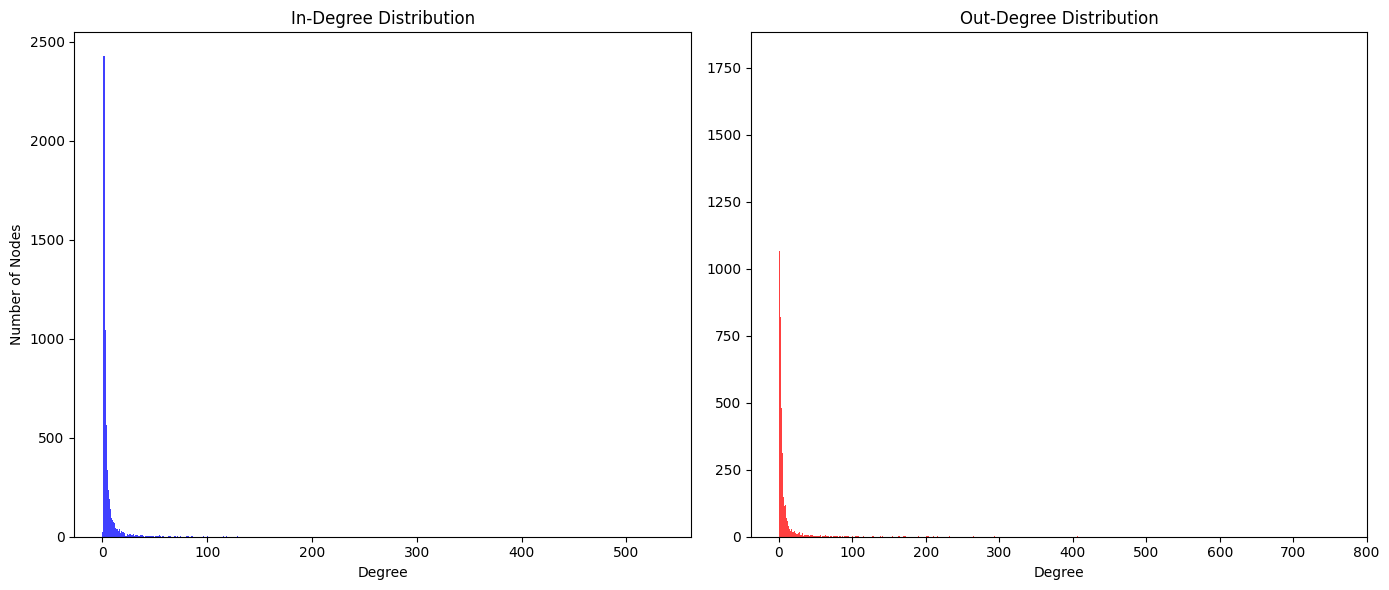

In [ ]:
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), alpha=0.75, color='blue')
plt.title('In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.subplot(122)
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), alpha=0.75, color='red')
plt.title('Out-Degree Distribution')
plt.xlabel('Degree')

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(15, 15))

# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, node_color='cyan', node_size=5, alpha=0.1)
# nx.draw_networkx_edges(G, pos, width=2.0, alpha=1)

# nx.draw_networkx(G,node_color = 'cyan')
# plt.show()
